<a href="https://colab.research.google.com/github/vaibhaviwaghaye/VAIBHAVI-NNDL-2022/blob/main/61_Conventional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOENCODER FEATURE EXTRACTION FOR CLASSIFICATION USING CONVENTIONAL AUTOENCODER**

***AIM: To use Conventional autoencoder feature extraction method for classification***

***THEORY:***

*An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image.*

*Data specific means that the autoencoder will only be able to actually compress the data on which it has been trained. For example, if you train an autoencoder with images of dogs, then it will give a bad performance for cats. The autoencoder plans to learn the representation which is known as the encoding for a whole set of data. This can result in the reduction of the dimensionality by the training network. The reconstruction part is also learned with this.*

*Lossy operations mean that the reconstructed image is often not an as sharp or high resolution in quality as the original one and the difference is greater for reconstructions with a greater loss and this is known as a lossy operation. The following image shows how the image is encoded and decoded with a certain loss factor.*

*The Input will be passed through a layer of encoders which are actually a fully connected neural network that also makes the code decoder and hence use the same code for encoding and decoding like an ANN.*

***IMPLEMENTATION:***

*Trained ANN through backpropagation works in the same way as the autoencoders. In this article we are going to discuss Conventional autoencoder which will be implemented as follows:*

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

## Loading the dataset and then normalizing the images.
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
## Hyperparameters
H = 28
W = 28
C = 1

## Latent space
latent_dim = 128

In [ ]:
## Building the autoencoder
inputs = Input(shape=(H, W, C), name="inputs")
x = inputs

x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
x = Dense(latent_dim, name="latent")(x)
x = Dense(units)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

outputs = x

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

print(x_train.shape, x_test.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496 

In [ ]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)
test_pred_y = autoencoder.predict(x_test)

Epoch 1/20
235/235 [==============================] - 137s 575ms/step - loss: 0.4641 - val_loss: 0.5116
Epoch 2/20
235/235 [==============================] - 129s 548ms/step - loss: 0.3890 - val_loss: 0.3912
Epoch 3/20
235/235 [==============================] - 128s 545ms/step - loss: 0.3511 - val_loss: 0.3497
Epoch 4/20
235/235 [==============================] - 127s 542ms/step - loss: 0.3266 - val_loss: 0.3250
Epoch 5/20
235/235 [==============================] - 128s 543ms/step - loss: 0.3098 - val_loss: 0.3060
Epoch 6/20
235/235 [==============================] - 127s 542ms/step - loss: 0.2978 - val_loss: 0.2967
Epoch 7/20
235/235 [==============================] - 128s 544ms/step - loss: 0.2889 - val_loss: 0.2883
Epoch 8/20
235/235 [==============================] - 128s 543ms/step - loss: 0.2821 - val_loss: 0.2803
Epoch 9/20
235/235 [==============================] - 128s 546ms/step - loss: 0.2768 - val_loss: 0.2767
Epoch 10/20
235/235 [==============================] - 128s 546m

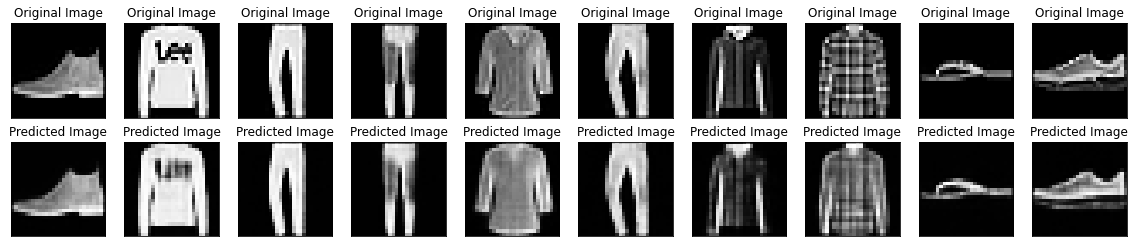

In [ ]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
   ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

***CONCLUSION***

*We have managed to classify the image using conventional autoencoder using feature extraction*